# STEP 48 다중 클래스 분류
- 이전 단계에서 소프트맥스 함수와 교차 엔트로피 오차를 구했다. 
- 이번 단계에서는 '스파이럴 데이터셋'이라는 작은 데이터 셋을 사용하여 다중 클래스 분류를 실제로 한다.  

  ('스파이럴은 나선형 혹은 소용돌이 모양을 뜻)'

## 48.1 스파이럴 데이터셋
- DeZero의 dezero/datasets.py 모듈에는 데이터 셋 관련 클래스와 함수가 준비되어 있다. 
- 머신러닝에서 사용하는 대표적인 데이터 셋 몇 가지 들어있는데, 여기서는 그중 '스파이럴 데이터셋'을 읽어오겠다. 

In [4]:
import dezero

x, t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


- get_spiral 함수는 인수로 train이라는 프래그를 받는다.
- train=True면 학습(훈련)용 데이터를 반환하고, False면 데스트용 데이터를 반환한다. 
- 실제로 반환되는 값은 입력 데이터인 x, 정답 데이터(레이블)인 t
- 형상은 각각 (300, 2)와 (300, )
- 이번에 다루는 문제는 3클래스 분류이브로 t의 원소는 0, 1, 2중 하나가 된다. 


<img src="./images/48-1.png" width="50%" height="50%"></img>  

- 각각의 클래스를 $\bigcirc$, $\triangle$, X  기호로 바꿔 그렸다. 

## 48.2 학습코드 

In [ ]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

# (1)하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

# (2)데이터 읽기 / 모델, 옵티마이져 생성
x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

- 지금까지 본 코드와 거의 같다. 
- (1)에서 우선 하이퍼파라미터를 설정한다. 하이퍼파라미터는 '사람'이 결정하는 매개변수 
- (2)에서 데이터셋을 읽고 모델과 옵티마이져 생성
- max_epoch = 300으로 설정했는데, 에포크(epoch)는 일종의 단위로 준비된 데이터 셋을 모두 사용했을 때 1에포크이다. 
- batch_size=30으로 설정하여 데이터를 한번에 30개씩 묶어 처리 하도록 했다. 
- 은닉층 수는 10 이고, 학습률은 1.0이다. 

NOTE_   
데이터가 많을 때는 모든 데이터를 한꺼번에 처리하는 대신 조금씩 무작위로 모아서 처리한다.  
이때의 데이터 뭉치를 미니배치(mini batch)라고 한다.   


In [ ]:
data_size = len(x)
max_iter = math.ceil(data_size / batch_size) # 소수점 반올림

for epoch in range(max_epoch):
    # (3) 데이터셋의 인덱스 뒤섞기 
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # (4) 미니배치 생성
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        # (5) 기울기 산출 / 매개변수 갱신
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # 에포크 마다 학습 경과 출력
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

(3)
(4)
(5)

<img src="./images/48-2.png" width="50%" height="50%"></img>   

- 그림 48-2와 같이 학습을 진행할수록 손실이 줄어든다. 올바른 방향으로 학습하고 있다는 뜻.  

- 학습이 완료된 신경망은 클래스 영역, 즉 결정경계(decision boundary)를 어떻게 구분하고 있는지 아래와 시각화된다.   

<img src="./images/48-3.png" width="50%" height="50%"></img>    

- 그림 48-3과 같이 학습 후 신경망은 '소용돌이' 패턴을 제대로 파악하고 있다. 
- 신경망이 비선형 분리 영역을 학습해낸 것이다.
- 신경망에 은닉층을 추가하면 복잡한 표현도 가능해진다.
- 층을 더 깊게 쌓는 식으로 표현력을 키울 수 있다는 것이 딥러닝의 특징

epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

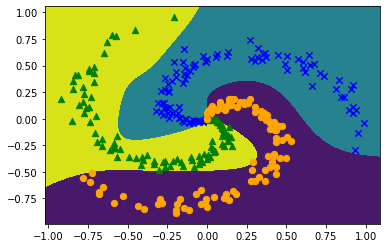

In [5]:
# step 48 코드
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
import math
import numpy as np
import matplotlib.pyplot as plt
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

# Hyperparameters
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))
#--------------------------------------------------------------------------------
# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()

# STEP 49 Dataset 클래스와 전처리

- 스파이럴 데이터셋은 300개 정도의 작은 데이터셋이라서 ndarray 인스턴스 하나로 처리할수 있었지만, 대규모 데이터셋을 처리할 때는 문제가 된다. 
- 거대한 데이터를 하나의 ndarray 인스턴스로 처리하면 모든 원소를 한꺼번에 메모리에 올려하는 문제
- 문제에 대응할 수 있도록 데이터셋 전용 클래스인 Dataset 클래스를 만든다. 
- Dataset클래스에는 데이터를 전처리할 수 있는 구조도 추가할 것이다. 

## 49-1 Dataset 클래스 구현  
- Dataset 클래스는 기반 클래스로서의 역할을 하고, 
- 사용자가 실제로 사용하는 데이터셋은 이를 상속하여 구현하게 할것이다. 

In [6]:
import numpy as np

class Dataset:
    def __init__(self, train=True):
        self.train = train
        self.data = None
        self.label = None
        self.prepare()
    
    def __getitem__(self, index):
        assert np.isscalar(indx) #index는 정수(스칼라)만 지원
        if self.label is None:
            return self.data[index], None
        else:
            return self.data[index], self.label[index]
        
    def __len__(self):
        return len(self.data)
    
    def prepare(self):
        pass

- 우선 초기화 때 train 인수를 받는다. 
-  
-  
- 

In [8]:
class Spiral(Dataset):
    def prepare(self):
        self.data, self.label = get_spiral(self.train)

- prepare 메서드에서는 인스턴스 변수인 data와 label에 데이터를 설정하는게 다이다. 

In [10]:
import dezero

train_set = dezero.datasets.Spiral(train=True)
print(train_set[0])
print(len(train_set))

(array([-0.13981389, -0.00721657], dtype=float32), 1)
300


- 0번째 입력 데이터와 레이블이 튜플로 반환되었다. 

## 49-2 큰 데이터셋의 경우  
- 스파이럴 데이터셋 같은 작은 데이터셋이라면 Dataset 클래스의 인스턴스 변수인 data와 label에 직접 ndarray 인스턴스를 유지해도 무리가 없다.
- 하지만 데이터셋이 훨씬 크면 위와 같은 구현 방식은 사용할 수 없다. 다음과 같이 생각해보았다. 

In [11]:
class BigData(Dataset):
    def __getitem__(index):
        x = np.load('data/{}.npy'.format(index))
        t = np.load('label/{}.npy'.format(index))
        return x, t
    
    def __len__():
        return 1000000

## 49-3 데이터 이어 붙이기 
신경망를 학습시킬 때는 데이터셋 중 일부를 미니배치로 꺼낸다. 

In [12]:
train_set = dezero.datasets.Spiral()

batch_index = [0, 1, 2] # 0에서 2번째까지의 데이터를 꺼냄
batch = [train_set[i] for i in batch_index]
# batch = [(data_0, label_0), (data_1, label_1),(data_2, label_2)]
x = np.array([example[0] for example in batch])
t = np.array([example[1] for example in batch])

print(x.shape)
print(t.shape)

(3, 2)
(3,)


## 49-4 학습코드

In [13]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dezero.datasets.Spiral(train=True)
model = MLP((hidden_size, 10))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(train_set)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # Create minibatch
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch = [train_set[i] for i in batch_index]
        batch_x = np.array([example[0] for example in batch])
        batch_t = np.array([example[1] for example in batch])

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

epoch 1, loss 1.35
epoch 2, loss 1.06
epoch 3, loss 0.98
epoch 4, loss 0.90
epoch 5, loss 0.88
epoch 6, loss 0.84
epoch 7, loss 0.84
epoch 8, loss 0.81
epoch 9, loss 0.79
epoch 10, loss 0.77
epoch 11, loss 0.80
epoch 12, loss 0.77
epoch 13, loss 0.76
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.76
epoch 17, loss 0.76
epoch 18, loss 0.80
epoch 19, loss 0.78
epoch 20, loss 0.77
epoch 21, loss 0.76
epoch 22, loss 0.74
epoch 23, loss 0.79
epoch 24, loss 0.77
epoch 25, loss 0.75
epoch 26, loss 0.77
epoch 27, loss 0.77
epoch 28, loss 0.74
epoch 29, loss 0.77
epoch 30, loss 0.75
epoch 31, loss 0.75
epoch 32, loss 0.77
epoch 33, loss 0.74
epoch 34, loss 0.75
epoch 35, loss 0.76
epoch 36, loss 0.74
epoch 37, loss 0.80
epoch 38, loss 0.73
epoch 39, loss 0.74
epoch 40, loss 0.74
epoch 41, loss 0.78
epoch 42, loss 0.75
epoch 43, loss 0.72
epoch 44, loss 0.74
epoch 45, loss 0.71
epoch 46, loss 0.72
epoch 47, loss 0.74
epoch 48, loss 0.71
epoch 49, loss 0.71
epoch 50, loss 0.71
epoch 51,

## 49-5 데이터 셋 전처리  
- 머신러닝에서는 모델에 데이터를 입력하기 전에 데이터를 특정한 형태로 가공하는 일이 많다. 
- 전처리(및 데이터 확장)에 대응하기 위해 Dataset 클래스에도 전처리 기능 추가

In [16]:
class Dataset:
    def __init__(self, train=True, transform=None, target_transform=None):
        self.train = train
        self.transform = transform
        self.target_transform = target_transform
        if self.transform is None:
            self.transform = lambda x: x
        if self.target_transform is None:
            self.target_transform = lambda x: x

        self.data = None
        self.label = None
        self.prepare()

    def __getitem__(self, index):
        assert np.isscalar(index)
        if self.label is None:
            return self.transform(self.data[index]), None
        else:
            return self.transform(self.data[index]),\
                   self.target_transform(self.label[index])

    def __len__(self):
        return len(self.data)

    def prepare(self):
        pass

- 초기화시에 transform 과 target_transform을 새롭게 받는다.   
- 

In [17]:
def f(x):
    y = x / 2.0
    return y

train_set = dezero.datasets.Spiral(transform=f)

- 이 코드는 입력데이터를 1/2로 스케일 변환하는 전처리 예이다. 
- 

In [21]:
from dezero import transforms

f = transforms.Normalize(mean=0.0, std=2.0)
train_set = dezero.datasets.Spiral(transform=f) # 책에 오타 있음

In [24]:
f = transforms.Compose([transforms.Normalize(mean=0.0, std=2.0),
                       transforms.AsType(np.float64)])

# STEP 50 미니배치를 뽑아주는 DataLoader 
- 이전 단계에서는 Dataset 클래스를 만들어서 통일된 인터페이스로 데이터셋을 다룰 수 있게 했다. 
- 이번 단계에서는 Dataset 클래스에서 미니배치를 뽑아주는 DataLoader 클래스를 구현한다. 
- DataLoader는 미니배치 생성과 데이터 뒤섞기 등의 기능을 제공하여 사용자가 작성해야 할 학습 코드가 더 간단해진다. 
- 반복자가 무엇인지 알아보고, DataLoader 클래스를 구현하는 흐름으로 진행하겠다. 

## 50.1 반복자란
- 이름에서 알 수 있듯이 원소를 반복하여 꺼낸다. 

In [25]:
t = [1, 2, 3]
x = iter(t)
next(x)

1

In [26]:
next(x)

2

In [27]:
next(x)

3

In [29]:
next(x)

StopIteration: 

- 리스트를 반복자로 변환하려면 iter함수를 사용한다. 이 코드는 리스트 t에서 x라는 반복자를 만들었다. 
- next함수를 사용해 데이터를 순서대로 추출한다. 
- 네번째 실행에서는 원소가 더 이상 존재하지 않기 때문에 StopIteration 예외가 발생했다. 

In [30]:
class MyIterator:
    def __init__(self, max_cnt):
        self.max_cnt = max_cnt
        self.cnt = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.cnt == self.max_cnt:
            raise StopIteration()
        
        self.cnt += 1
        return self.cnt

- MyIterator라는 클래스를 구현했다. 
- 
- 

In [31]:
obj = MyIterator(5)
for x in obj:
    print(x)

1
2
3
4
5


- for x in obj: 구문을 사용하여 원소를 꺼낼 수 있다. 
- 다음은 반복자 구조를 이용하여 미니배치를 뽑아주는 DataLoader 클래스를 구현한다. 
- 

In [ ]:
import math
import random
import numpy as np

class DataLoader:
    def __init__(self, dataset, batch_size, shuffle=True):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.data_size = len(dataset)
        self.max_iter = math.ceil(self.data_size / batch_size)

        self.reset()

    def reset(self):
        self.iteration = 0 # 반복 횟수 초기화
        if self.shuffle:
            self.index = np.random.permutation(len(self.dataset)) # 데이터 뒤섞기
        else:
            self.index = np.arange(len(self.dataset))

    def __iter__(self):
        return self

    def __next__(self):
        if self.iteration >= self.max_iter:
            self.reset()
            raise StopIteration

        i, batch_size = self.iteration, self.batch_size
        batch_index = self.index[i * batch_size:(i + 1) * batch_size]
        batch = [self.dataset[i] for i in batch_index]
        x = xp.array([example[0] for example in batch])
        t = xp.array([example[1] for example in batch])

        self.iteration += 1
        return x, t

    def next(self):
        return self.__next__()

- 초기화 메서드는 다음 인수를 받는다. 
    + dataset: Dataset 인터페이스를 만족하는 인스턴스
    + batch_size : 배치 크기
    + shuffle : 에포크별 데이터셋을 뒤섞을지 여부 
- 
- 

## 50.2 DataLoader 사용하기

In [32]:
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        print(x.shape, t.shape) # x, t는 훈련데이터
        break
        
    # 에포크 끝에서 테스트 데이터를 꺼낸다.     
    for x, t in test_loader:
        print(x.shape, t.shape) # x, t는 테스트 데이터
        break

(10, 2) (10,)
(10, 2) (10,)


- 훈련용과 테스트용 각각, 총 두개의 DataLoader를 생성했다. 
- 
- 

## 50.3 accuracy 함수 구현하기

In [36]:
def accuracy(y, t):
    y, t = as_variable(y), as_variable(t)
    
    pred = y.data.argmax(axis=1).reshape(t.shape)
    result = (pred == t.data)
    acc = result.mean()
    return Variable(as_array(acc))

- accuracy 함수는 인수 y와 t를 받아서 '정답률'을 계산해준다. 
- 
- 

In [39]:
import numpy as np
import dezero.functions as F

y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


## 50.4 스파이럴 데이터셋 학습코드 

In [ ]:
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

train_set = dezero.datasets.Spiral(train=True)
test_set = dezero.datasets.Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader: # (1) 훈련용 미니배치 데이터 
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t) # (2) 훈련 데이터의 인식 정확도 
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad(): # 기울기 불필요 모드
        for x, t in test_loader: # 테스트용 미니배치 데이터
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t) # 테스트 데이터의 인식 정확동 
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

<img src="./images/50-1.png" ></img>  

- 그림50-1을 보면...
- 

NOTE_
과대적합(overfiting)은 특정 훈련 데이터에 지나치게 최적화된 상태를 말한다. 

# STEP 51 MNIST 학습  

- 지금까지 데이터셋을 쉽게 다룰 수 있는 구조를 마련했다. 
- Dataset 클래스로 데이터셋 처리를 위한 공통 인터페이스를 마련했고,
- '전처리'를 설정할 수 있도록 했다. 
- DataLoader 클래스로는 Dataset에서 미니배치 단위로 데이터를 꺼내올 수 있게 했다.   
<img src="./images/51-1.png" ></img>  

## 51.1 MNIST 데이터 셋

In [ ]:
import dezero

train_set = dezero.datasets.MNIST(train=True, transform=None)
test_set = dezero.datasets.MNIST(train=True, transform=None)

print(len(train_set))
print(len(test_set))

In [ ]:
x, t = train_set[0]
print(type(x), x.shape)
print(t)

In [ ]:
import matplotlib.pyplot as plt

# 데이터 예시
x, t = train_set[0] # 0번째 (data, label) 추출
plt.show(x.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

<img src="./images/51-2.png" width="50%" height="50%"></img>  

In [ ]:
def f(x):
    x = x.flatten()
    x = x.astype(np.float32)
    x /= 255.0
    return x

train_set = dezero.datasets.MNIST(train=True, transform=f)
test_set = dezero.datasets.MNIST(train=False, transform=f)

## 51.2 MNIST 데이터 셋

In [ ]:
max_epoch = 5
batch_size = 100
hidden_size = 1000

train_set = dezero.datasets.MNIST(train=True)
test_set = dezero.datasets.MNIST(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

model = MLP((hidden_size, 10))
optimizer = optimizers.SGD().setup(model)
#model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
#optimizer = optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    sum_loss, sum_acc = 0, 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        acc = F.accuracy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(t)
        sum_acc += float(acc.data) * len(t)

    print('epoch: {}'.format(epoch+1))
    print('train loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(train_set), sum_acc / len(train_set)))

    sum_loss, sum_acc = 0, 0
    with dezero.no_grad():
        for x, t in test_loader:
            y = model(x)
            loss = F.softmax_cross_entropy(y, t)
            acc = F.accuracy(y, t)
            sum_loss += float(loss.data) * len(t)
            sum_acc += float(acc.data) * len(t)

    print('test loss: {:.4f}, accuracy: {:.4f}'.format(
        sum_loss / len(test_set), sum_acc / len(test_set)))

## 51.3 모델 개선

ReLU는 입력이 0보다 크면 입력 그대로 출력하고, 0 이하면 0을 출력하는 함수이다. 
$$h(x)=\begin{cases}
x \text{ }(x>0) \\
0 \text{ }(x\leq0)
\end{cases}$$

In [ ]:
class ReLU(Function):
    def forward(self, x):
        xp = cuda.get_array_module(x)
        y = xp.maximum(x, 0.0) # (1)
        return y

    def backward(self, gy):
        x, = self.inputs
        mask = x.data > 0 #(2)
        gx = gy * mask #(3)
        return gx


def relu(x):
    return ReLU()(x)

In [ ]:
#model = MLP((hidden_size, 10))
model = MLP((hidden_size, hidden_size, 10), activation=F.relu)

- 3층 신경망을 만들었다. 

### 칼럼 : 딥러닝 프레임워크

- Define-by-Run 방식의 자동미분
- 계층 컬렉션
- 옵티마이져 컬렉션